![jakob-owens-CiUR8zISX60-unsplash.jpg](images/jakob-owens-CiUR8zISX60-unsplash.jpg)

<H1>Release Date, Film Length and ROI </H1><hr>

<H2>Import and clean the data.</H2>

*Import appropriate packages.*

In [10]:
import pandas as pd
import requests as rq
import matplotlib.pyplot as plt
import numpy as np
import tmdbsimple as tmdb
from datetime import datetime
from config import tmdb_key
tmdb.API_KEY = tmdb_key
%matplotlib inline

*Import the data. Some of this data was gleaned from the TMDB api, cleaned and formatted, and saved as a csv using a different notebook.*

In [11]:
#dataset provided
df_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')

In [12]:
#dataset from TMDB api
df_financial = pd.read_csv('zippedData/tmdb_financials.csv')

In [13]:
#reset indices to prepare for join
df_movies = df_movies.set_index('id')
df_financial = df_financial.set_index('id')

In [14]:
#join datasets on film ID
df = df_movies.join(df_financial,how='inner')
df.drop(['vote_average', 'vote_count','original_language', 'original_title',
       'popularity','Unnamed: 0'],axis=1,inplace = True)
df.shape

(1236, 7)

*Convert strings to appropriate datatypes and adding some columns to filter by.*

In [15]:
#formatting date/time objects and adding day, month and year columns
df['release_date']=pd.to_datetime(df['release_date'],infer_datetime_format=True)
df['release_day'] = df['release_date'].dt.day_name()
df['release_month'] = df['release_date'].dt.month_name()
df['release_year'] = df['release_date'].dt.year

#limiting the dataset to include only high budget films
df= df[df['budget'] >= 100000000]
df.shape

(302, 10)

<H1> Explore release timing effect on ROI </H1>

*Create data frames for individual months*

In [16]:
#create list of months from data set
months = list(set(df['release_month'].unique()))
#sort months as they occur through the year
months = sorted(months, key=lambda m: datetime.strptime(m, "%B"))

In [17]:
month_dfs = []
for month in months:
    month_dfs.append(pd.DataFrame(df[df['release_month']==month]))
months

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

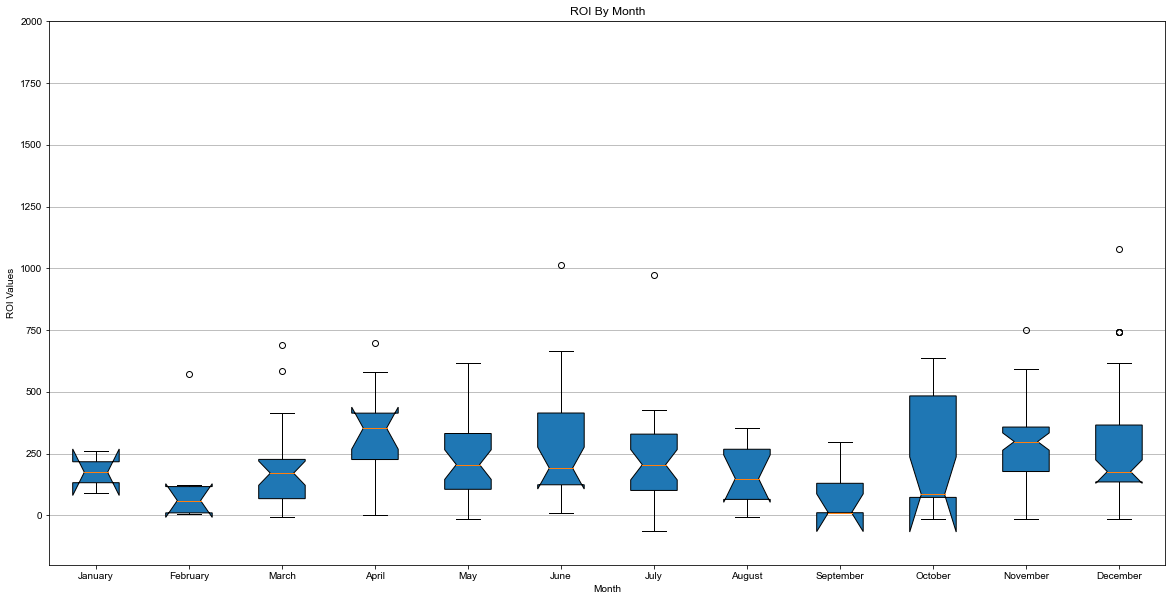

In [18]:
#for each month, create a dataframe
labels = months
all_data = []
for month in month_dfs:
    all_data.append(month['roi'])
    
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
# rectangular box plot
bplot1 = ax1.boxplot(all_data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,
                     notch=True,# fill with color
                     labels=labels)  # will be used to label x-ticks
# prettify and label
ax1.set_title('ROI By Month')
ax1.yaxis.grid(True)
ax1.set_xlabel('Month')
ax1.set_ylabel('ROI Values')
ax1.set_ylim(-200,2000)

plt.style.use('seaborn-darkgrid')

plt.show()

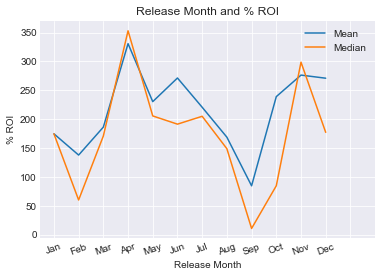

In [19]:
month_mean = []
for df in month_dfs:
    month_mean.append(df['roi'].mean())
    
month_med = []
for df in month_dfs:
    month_med.append(df['roi'].median())
    
plt.plot(month_mean, label='Mean')
plt.plot(month_med, label='Median')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','',''],rotation=20)
plt.style.use('seaborn-darkgrid')
plt.xlabel('Release Month')
plt.ylabel('% ROI')
plt.title('Release Month and % ROI')
plt.savefig('./images/month_and_roi.png')
plt.legend();
#this vis shows that the highest ROI, which is a %, is in April. That does NOT mean the most revenue was generated in April.
#put next to a vis showing revenue by month

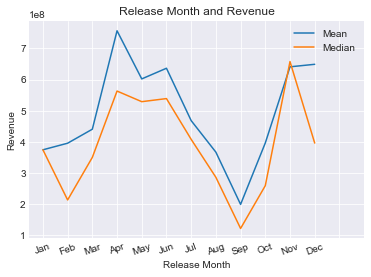

In [20]:
monthrev_mean = []
for df in month_dfs:
    monthrev_mean.append(df['revenue'].mean())
    
monthrev_med = []
for df in month_dfs:
    monthrev_med.append(df['revenue'].median())
    
plt.plot(monthrev_mean, label='Mean')
plt.plot(monthrev_med, label='Median')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','',''],rotation=20)
plt.style.use('seaborn-darkgrid')
plt.xlabel('Release Month')
plt.ylabel('Revenue')
plt.title('Release Month and Revenue')
plt.savefig('./images/month_and_rev.png')
plt.legend();

## Insights: Release Month ##
By viewing the monthly median and mean on the same plot with the Y axis as the ROI % and the X axis as months, we can see the spikes in ROI by month. We can also begin to understand, at a high level, the consistency or variability by month. The spikes in ROI occur un March and October. 

*Create data frames for individual days.*

In [21]:
days = list(df['release_day'].unique())
df_mon= df[df['release_day'] == 'Monday']
df_tues= df[df['release_day'] == 'Tuesday']
df_wed= df[df['release_day'] == 'Wednesday']
df_thurs= df[df['release_day'] == 'Thursday']
df_fri= df[df['release_day'] == 'Friday']
df_sat= df[df['release_day'] == 'Saturday']
df_sun= df[df['release_day'] == 'Sunday']

day_dfs = [df_mon,df_tues,df_wed,df_thurs,df_fri,df_sat,df_sun]

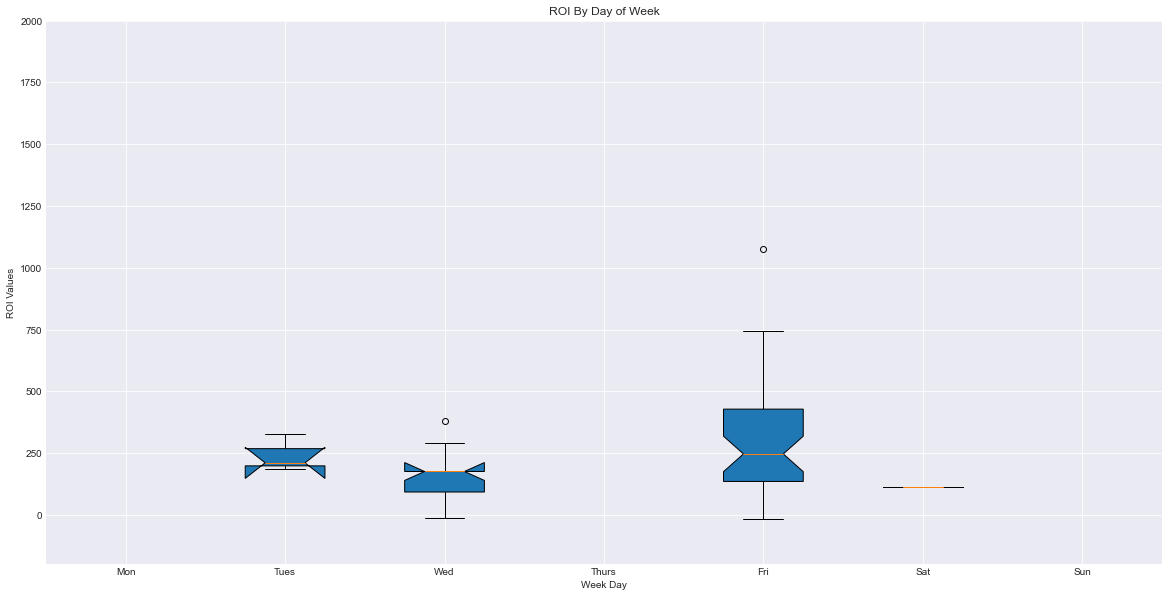

In [22]:
labels = ['Mon', 'Tues', 'Wed','Thurs','Fri','Sat','Sun']
all_data = [df_mon['roi'],df_tues['roi'],df_wed['roi'],df_thurs['roi'],df_fri['roi'],df_sat['roi'],df_sun['roi']]

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
# rectangular box plot
bplot1 = ax1.boxplot(all_data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,
                     notch=True,# fill with color
                     labels=labels)  # will be used to label x-ticks

# prettify and label
ax1.set_title('ROI By Day of Week')
ax1.yaxis.grid(True)
ax1.set_xlabel('Week Day')
ax1.set_ylabel('ROI Values')
ax1.set_ylim(-200,2000)
plt.style.use('seaborn-darkgrid')
plt.savefig('./images/day_of_week.png')
plt.show()

## Insights: Release Day ##
The majority of films are released on Friday, and films released on Friday have the highest ROI.<hr>

<H1> Runtime and ROI </H1>

First, let's see how the runtimes are distributed for films in the last 20 years.

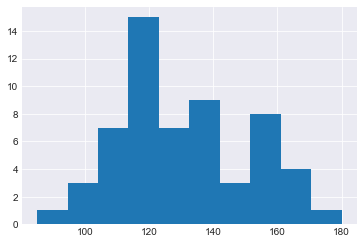

In [23]:
df['runtime'].hist()
plt.style.use('seaborn-darkgrid');

It looks like the bulk of films are between 105-140 minutes long.<br>
Seeing that, I'm curious to know if our attention span and resulting appetite for films has changed in the last 20 years. I'll further filter the data set to see runtimes in the last 10 and last 5 years only.

''

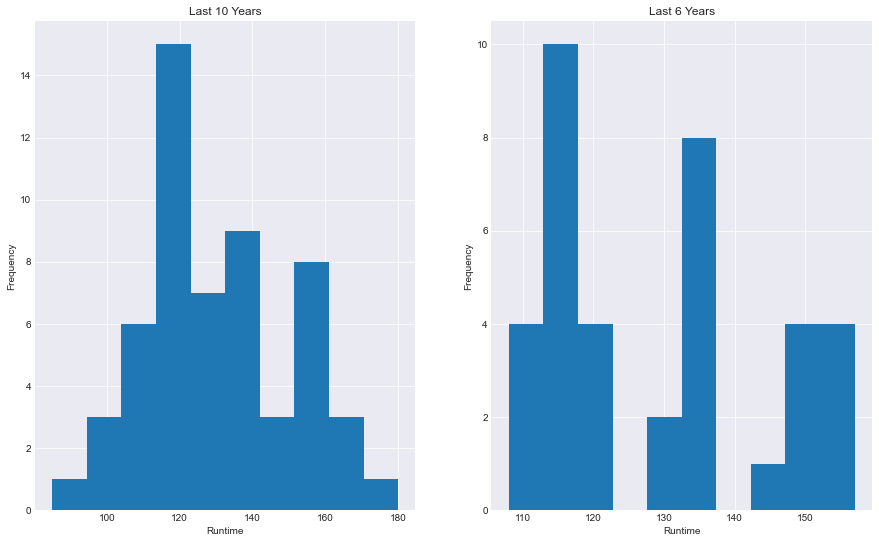

In [24]:
df_last10 = df[df['release_year']>2009]
df_last6 = df[df['release_year']>2014]
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(15,9))
ax1.hist(df_last10['runtime'])
ax1.set_title('Last 10 Years')
ax1.set_xlabel('Runtime')
ax1.set_ylabel('Frequency')
ax2.hist(df_last6['runtime'])
ax2.set_title('Last 6 Years')
ax2.set_xlabel('Runtime')
ax2.set_ylabel('Frequency')
plt.savefig('./images/runtime.png')
;

There doesn't appear to be much change in the distribution of runtime across the subsets of data. <br> Initial observations are that the median length film amongst high ROI films is between 110-120 minutes in length.<br> Now I will calculate the correlation between runtime and roi using films that are within the 90-130 minute range.

In [39]:
df_med_length = df[(df['runtime']> 80) & (df['runtime']< 130)]
df['runtime'].corr(df['roi'])

0.5199317535663471

Within a range of 80 and 130 minutes of runtime, the runtime and ROI are positively correlated. Films outside of that range perform poorly. 

In [41]:
d = np.polyfit(df['runtime'],df['roi'],1)
f = np.poly1d(d)
# df.insert(6,'run_reg',f(df['runtime']))


Index(['genre_ids', 'release_date', 'title', 'runtime', 'budget', 'revenue',
       'roi', 'release_day', 'release_month', 'release_year'],
      dtype='object')

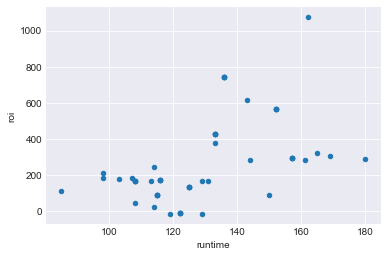

In [43]:
ax=df.plot.scatter(x='runtime', y='roi')
# df_median.plot(x='runtime',y='run_reg',color='red',legend=True,ax=ax);
df_median.columns

In [28]:
df_shorter = df[df['runtime']<110]
len(df_shorter)

10

In [34]:
df_shorter['runtime'].corr(df_shorter['roi'])

0.048113289545011796

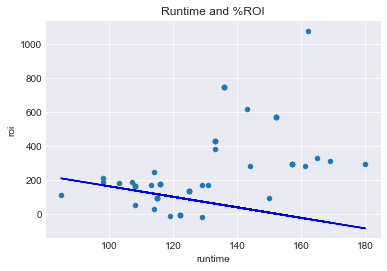

In [48]:
d = np.polyfit(df_shorter['runtime'],df_shorter['roi'],1)
f = np.poly1d(d)
# df.insert(6,'run_reg',f(df['runtime']))

ax=df.plot.scatter(x='runtime', y='roi')
df.plot(title='Runtime and %ROI',x='runtime',y='run_reg',color='blue',legend=False,ax=ax);

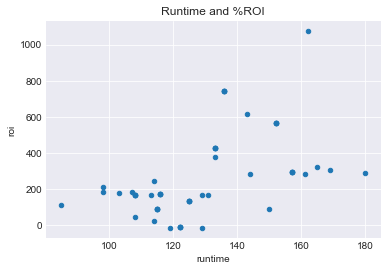

In [49]:
d = np.polyfit(df['runtime'],df['roi'],1)
f = np.poly1d(d)
# df.insert(6,'run_reg',f(df['runtime']))

ax=df.plot.scatter(title='Runtime and %ROI',x='runtime', y='roi')
# df.plot(title='Runtime and %ROI',x='runtime',y='run_reg',color='blue',legend=False,ax=ax)
ax.savefig='./images/runtime_ROI.png';